# Import class/ packages

In [4]:
%reset
%cd /Users/yuyuan/Desktop/Work/CMDM_Lab/COVID19_Proj_toGitHub
import pandas as pd
from sklearn.decomposition import PCA
from StructuralAnalysisTools.mdPLOTtools import read_xvg
import matplotlib.pyplot as plt
import numpy as np

/Users/yuyuan/Desktop/Work/CMDM_Lab/COVID19_Proj_toGitHub


## class MyPlot

In [5]:
class MyPlot:
    def __init__(self, data, colors, variants_target):    
        self.data = data
        self.colors = colors
        self.variants_target = variants_target

    def return_ax3d(self, ax, title="", comp = [0,1,2]):
        for target_name in self.colors.keys():
            ax.scatter(self.data[self.variants_target == target_name, comp[0]], 
                        self.data[self.variants_target == target_name, comp[1]],
                        self.data[self.variants_target == target_name, comp[2]],
                        color=colors[target_name], lw=2, label=target_name)
        ax.legend(loc="best", shadow=False, scatterpoints=1)
        ax.set_title(title)
        return ax

    def return_ax(self, ax, title="", comp = [0,1]):
        for target_name in self.colors.keys():
            ax.scatter(self.data[self.variants_target == target_name, comp[0]], self.data[self.variants_target == target_name, comp[1]],
                        color=colors[target_name], lw=2, label=target_name)
        ax.legend(loc="best", shadow=False, scatterpoints=1)
        ax.set_title(title)
        return ax

    def quick(self, comp = [0,1]):
        plt.figure(figsize=(8, 8))
        for target_name in self.colors.keys():
            print(target_name)
            plt.scatter(self.data[self.variants_target == target_name, comp[0]], self.data[self.variants_target == target_name, comp[1]],
                        color=colors[target_name], lw=2, label=target_name)
        plt.legend(loc="best", shadow=False, scatterpoints=1)
        #plt.axis([-100, 100, -100, 100])
        plt.show()

# Read data

In [33]:
thefile = 'hbnum' #rmsd(1), gyrate(1), hbac(2:ac, 4:corr), hbnum(1:num, 2:pairs 0.35nm)
thecolunm = 2
##
variants_list = ['WT', 'alpha', 'beta', 'gamma', 'delta','deltaplus',  'epsilon', 'lambda', 'mu']
pdbcodes = ['6m0j', '7a91']
x_list = []
y_list = []
variants_name = []
variants_target = []
for pdbcode in pdbcodes:
    for variant in variants_list:
        wkdir = f'metadata/md_results/variants_{pdbcode}/{variant}'
        x, y, header, x_avg, y_avg = read_xvg(wkdir, f'{thefile}.xvg', thecolunm)
        x_list.append(x)
        y_list.append(y)
        variants_name.append(f'{variant}_{pdbcode}')
        variants_target.append(variant)

#### ground truth
variants_list = ['alpha', 'beta', 'gamma', 'delta']
pdbcodes = ['7mjn', '7v80','7v84','7v8b']
for variant, pdbcode in zip(variants_list, pdbcodes):
    wkdir = f'metadata/md_results/variants_{pdbcode}/{variant}'
    x, y, header, x_avg, y_avg = read_xvg(wkdir, f'{thefile}.xvg', thecolunm)
    x_list.append(x)
    y_list.append(y)
    variants_name.append(f'{variant}_{pdbcode}')
    variants_target.append(variant)

variants_target = pd.Series(variants_target)
df = pd.DataFrame(y_list)
df.index = variants_name
df.head()

,0,1,2,3,4,5,6,7,8,9,...,9991,9992,9993,9994,9995,9996,9997,9998,9999,10000
WT_6m0j,9.0,12.0,5.0,12.0,10.0,8.0,8.0,12.0,10.0,5.0,...,12.0,11.0,11.0,12.0,14.0,9.0,15.0,14.0,10.0,17.0
alpha_6m0j,15.0,8.0,11.0,12.0,7.0,11.0,8.0,13.0,13.0,9.0,...,17.0,15.0,19.0,12.0,14.0,17.0,12.0,19.0,11.0,13.0
beta_6m0j,13.0,9.0,8.0,8.0,9.0,14.0,6.0,10.0,12.0,11.0,...,9.0,14.0,8.0,8.0,8.0,16.0,8.0,14.0,9.0,10.0
gamma_6m0j,11.0,6.0,11.0,11.0,9.0,9.0,8.0,14.0,6.0,13.0,...,9.0,10.0,13.0,13.0,10.0,12.0,12.0,12.0,13.0,7.0
delta_6m0j,9.0,7.0,11.0,3.0,7.0,10.0,11.0,10.0,7.0,9.0,...,12.0,9.0,9.0,11.0,5.0,9.0,12.0,6.0,10.0,10.0


## Parameters

In [34]:
n_components = 3
pca = PCA(n_components=n_components)
df_pca = pca.fit_transform(df)
colors = {
    'WT':'#adadad', 
    'alpha':'#1f77b4', 
    'beta':'#ff7f0e', 
    'gamma':'#2ca02c', 
    'delta':'#d62728', 
    'deltaplus':'#d48585', 
    'epsilon':'#9467bd', 
    'lambda':'#8c564b',
    'mu':'#e377c2'
}

## pca dataframe

In [35]:
df_pca_output = pd.DataFrame(df_pca)
df_pca_output.index = variants_name
df_pca_output.columns = ['PCA1', 'PCA2', 'PCA3']

## Save csv

In [36]:
df_pca_output.to_csv(f'metadata/md_results/ReduceDimensionByPCA/{thefile}_0.35nm.csv')

## Visualization

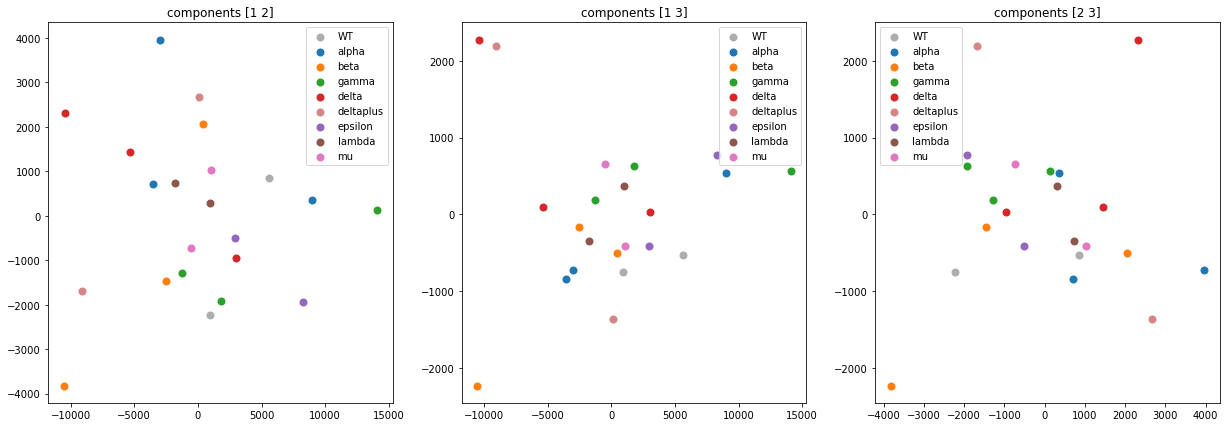

In [9]:
fig, axes = plt.subplots(1,3, figsize = [21,7])
comps = [[0,1], [0,2], [1,2]]
for comp,ax in zip(comps, axes):
    ax = MyPlot(df_pca, colors, variants_target).return_ax(ax, title = f'components {np.array(comp)+1}',comp = comp)

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  


Text(0.5, 0, 'PCA3')

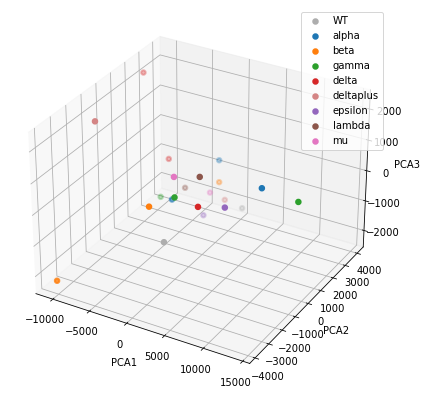

In [10]:
fig = plt.figure(figsize=[7,7])
ax = fig.gca(projection = '3d')
MyPlot(df_pca, colors, variants_target).return_ax3d(ax)
ax.set_xlabel('PCA1')
ax.set_ylabel('PCA2')
ax.set_zlabel('PCA3')